# The Analysis of the Trend of Airbnb Business, Policies and Impact of Covid-19 Pandemic in London, UK
   - CASA0013 Introduction to Programming for Spatial Analysts
   - Student id: 20044050
   - Word count: 2,398

## Executive Summary

This report provides a trend and comparison analysis of Airbnb listings change in London, UK in the last five years (from 2015 to 2020). The recommendations and their data evidence are given below:

- The fundamentals of Airbnb business show fast growth since 2015. The statistics of Airbnb listings increased from 20,000 in 2015 to 90,000 by 2020 in London (around 35% growth per year)

- The remarkably climbing demand for Airbnb listings can be witnessed in London since 2016. The average price of listings increased from 95 GBP (2016) to 125 GBP(2020), which means that there are nearly 7% growth for each year) Simultaneously, there was a downward trend can be seen in the average annual availability of listings counted in days from more than 240 in 2015 to nearly 120 in 2020, which means an upward trend in demand.

- The price change is later than that in supply (approximately two months).  The decreasing can be found in the data of Airbnb listings from March whilst the similar downward trend was observed in the price from early April. Besides, the number of Airbnb listings from recovered from late July while price rebound from October.

- It is highly recommended to invest and support Airbnb business in London. Although the covid-19 caused national wide lockdown did affect the Airbnb business a lot in London,  the demand and supply of Airbnb listings will recover quickly once the lockdown policy is relaxing


# Reproducible Analysis 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import time
pd.options.display.max_rows = 999

## 1. Pre-Covid Analysis

Store the links of Airbnb listings datasets from 2015 to 2020 in dictionary "urls". These links can be found in the http://insideairbnb.com/get-the-data.html ("London, England, United Kingdom" > "show archived data"). The reason why the range of pre-covid data was chosen as shown below is that covid-19 outbreak in London started from 12 February 2020.

In [2]:
urls = {}
urls[2015] = 'http://data.insideairbnb.com/united-kingdom/england/london/2015-04-06/visualisations/listings.csv'
urls[2016] = 'http://data.insideairbnb.com/united-kingdom/england/london/2016-02-02/visualisations/listings.csv'
urls[2017] = 'http://data.insideairbnb.com/united-kingdom/england/london/2017-03-04/visualisations/listings.csv'
urls[2018] = 'http://data.insideairbnb.com/united-kingdom/england/london/2018-04-08/visualisations/listings.csv'
urls[2019] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-02-05/visualisations/listings.csv'
urls[2020] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-02-16/visualisations/listings.csv'

The `urls` dictionary is shown below:

In [3]:
urls

{2015: 'http://data.insideairbnb.com/united-kingdom/england/london/2015-04-06/visualisations/listings.csv',
 2016: 'http://data.insideairbnb.com/united-kingdom/england/london/2016-02-02/visualisations/listings.csv',
 2017: 'http://data.insideairbnb.com/united-kingdom/england/london/2017-03-04/visualisations/listings.csv',
 2018: 'http://data.insideairbnb.com/united-kingdom/england/london/2018-04-08/visualisations/listings.csv',
 2019: 'http://data.insideairbnb.com/united-kingdom/england/london/2019-02-05/visualisations/listings.csv',
 2020: 'http://data.insideairbnb.com/united-kingdom/england/london/2020-02-16/visualisations/listings.csv'}

First, create a new dictionary `df_summ_listing_per_year`. Then you can use `read_csv` to read all the urls in pandas dataframe format and create a new variable called `year` for each row in the dataframe.

In [4]:
df_summ_listing_per_year = {}
# *** This might take for a while to read csv file (maybe less than 5 minutes) ***
for year in urls.keys():
    t0 = time.time()
    url = urls[year]
    print('Reading data from ', url)
    df_summ_listing = pd.read_csv(url)
    print('time taken', time.time()-t0, 'sec') # count the data loading time
    # create a new columns called "year" for each row in the dataframe
    df_summ_listing['year'] = year
    # add dataframes in these six years to the dictionary "df_summ_listing_per_year"
    df_summ_listing_per_year[year] = df_summ_listing

Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2015-04-06/visualisations/listings.csv
time taken 4.388001441955566 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2016-02-02/visualisations/listings.csv
time taken 5.754214763641357 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2017-03-04/visualisations/listings.csv
time taken 7.79807710647583 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2018-04-08/visualisations/listings.csv
time taken 9.582064151763916 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2019-02-05/visualisations/listings.csv
time taken 10.551798105239868 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2020-02-16/visualisations/listings.csv
time taken 10.302597522735596 sec


Merge these dataframes from dictionary `df_summ_listing_per_year` into a new dataframe called `df_combined`. Then, you can check all the variables by `head()` function (here I set the first 5 rows to output)

In [5]:
df_combined = pd.concat(df_summ_listing_per_year.values())
# Overview of df_combined dataframe
df_combined.head(n=5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year
0,600795,London Zone1 LOFT 1Bed/1Lounge flat,485861,Lara,NaN,Tower Hamlets,51.512390,-0.063669,Entire home/apt,89,2,62,2015-02-25,2.1,8,355.0,2015
1,4530027,Double room 20mins to Oxford Street,23486604,Jasmine,NaN,Barnet,51.615380,-0.144852,Shared room,100,1,0,NaN,NaN,1,365.0,2015
2,896177,Cosy room for 1 or 2 in Kennington,4777568,Cameron,NaN,Southwark,51.491397,-0.102909,Private room,65,2,9,2013-10-12,0.4,1,352.0,2015
3,3770567,Double Room with large garden,11255553,Mike,NaN,Islington,51.547610,-0.098068,Private room,45,1,0,NaN,NaN,1,221.0,2015
4,4292560,Superb 3BR House Notting Hill VP,1432477,Maxime And Fanny,NaN,Kensington and Chelsea,51.518255,-0.206391,Entire home/apt,399,2,10,2015-03-01,1.8,100,290.0,2015


Now, you can count the frequency of samples grouped by `year` then make a visualisation.

Text(0, 0.5, 'Frequency')

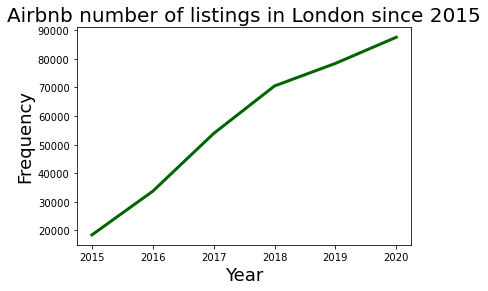

In [6]:
# plot number of listings in the past six years
fig_precovid_listings = df_combined.groupby('year')['id'].count().plot(color = 'darkgreen',linewidth=3).get_figure()
plt.title('Airbnb number of listings in London since 2015',fontsize=20)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Frequency',fontsize=18)

Text(0, 0.5, 'Average price (GBP)')

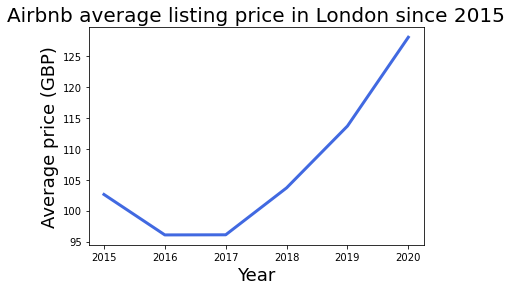

In [7]:
# plot average listing price in the past six years
fig_precovid_price = df_combined.groupby('year')['price'].mean().plot(color = "royalblue",linewidth=3).get_figure()
plt.title('Airbnb average listing price in London since 2015',fontsize = 20)
plt.xlabel('Year',fontsize = 18)
plt.ylabel('Average price (GBP)',fontsize = 18)

Text(0, 0.5, 'Availability (days)')

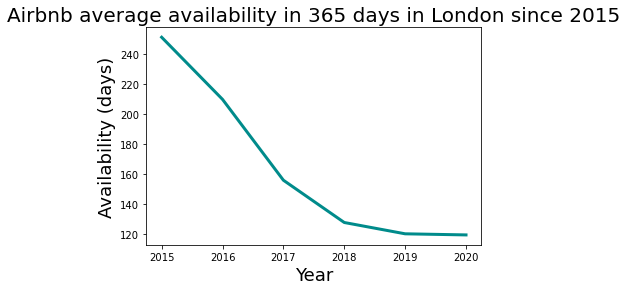

In [8]:
# plot average availability days
fig_precovid_availability = df_combined.groupby('year')['availability_365'].mean().plot(color = "darkcyan",linewidth=3).get_figure()
plt.title('Airbnb average availability in 365 days in London since 2015',fontsize = 20)
plt.xlabel('Year',fontsize = 18)
plt.ylabel('Availability (days)',fontsize = 18)

## 2 Impact of Covid-19 Analysis

Simultaneouly, according to the above process, create the dictionary `urls_covid` to store links.

In [9]:
# load and read monthly data in the past two years
urls_covid = {}
urls_covid[202012] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-12-16/visualisations/listings.csv'
urls_covid[202011] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-11-06/visualisations/listings.csv'
urls_covid[202010] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-10-13/visualisations/listings.csv'
urls_covid[202009] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-09-11/visualisations/listings.csv'
urls_covid[202008] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-08-24/visualisations/listings.csv'
urls_covid[202007] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-07-14/visualisations/listings.csv'
urls_covid[202006] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-06-11/visualisations/listings.csv'
urls_covid[202005] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-05-10/visualisations/listings.csv'
urls_covid[202004] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-04-14/visualisations/listings.csv'
urls_covid[202003] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-03-15/visualisations/listings.csv'
urls_covid[202002] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-02-16/visualisations/listings.csv'
urls_covid[202001] = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-01-09/visualisations/listings.csv'
# -------------------********-------------------
urls_covid[201912] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-12-09/visualisations/listings.csv'
urls_covid[201911] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-11-05/visualisations/listings.csv'
urls_covid[201910] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-10-15/visualisations/listings.csv'
urls_covid[201909] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-09-14/visualisations/listings.csv'
urls_covid[201908] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-08-09/visualisations/listings.csv'
urls_covid[201907] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-07-10/visualisations/listings.csv'
urls_covid[201906] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-06-05/visualisations/listings.csv'
urls_covid[201905] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-05-05/visualisations/listings.csv'
urls_covid[201904] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-04-09/visualisations/listings.csv'
urls_covid[201903] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-03-07/visualisations/listings.csv'
urls_covid[201902] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-02-05/visualisations/listings.csv'
urls_covid[201901] = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-01-13/visualisations/listings.csv'

In [10]:
# *** This might take for a while to read csv file (maybe less than 5 minutes) ***
# read csv into DataFrames and save into a dictionary 
df_summ_cov_listing_per_year = {}
for year in urls_covid.keys():
    t0 = time.time()
    url=urls_covid[year]
    print('Reading data from ', url)
    df_summ_cov_listing = pd.read_csv(url)
    print('time taken', time.time()-t0, 'sec')
    df_summ_cov_listing['year'] = year
    df_summ_cov_listing_per_year[year] = df_summ_cov_listing

Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2020-12-16/visualisations/listings.csv
time taken 11.198619842529297 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2020-11-06/visualisations/listings.csv
time taken 10.856090545654297 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2020-10-13/visualisations/listings.csv
time taken 9.107778549194336 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2020-09-11/visualisations/listings.csv
time taken 9.061921119689941 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2020-08-24/visualisations/listings.csv
time taken 8.608404159545898 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2020-07-14/visualisations/listings.csv
time taken 14.440271139144897 sec
Reading data from  http://data.insideairbnb.com/united-kingdom/england/london/2020-06-11/visualis

In [11]:
# combined all the individual DataFrames
df_covid_combined = pd.concat(df_summ_cov_listing_per_year.values())

Then, we need to drop the null value when transform the type of data before observing the trend in the scale of month.

In [12]:
# convert time format
df_covid_combined['time'] = pd.to_datetime(df_covid_combined['year'], format='%Y%m', errors='coerce').dropna()

Now, you can count the frequency of samples grouped by year then make a visualisation. The distribution of samples before and after covid-19 outbreak can be observed in this figure.

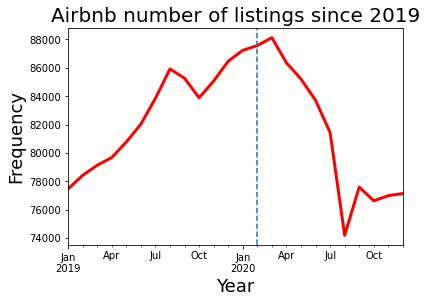

In [13]:
# plot number of listings since 2019 and highlight the covid-19 outbreak date
fig_covid_listings = df_covid_combined.groupby('time')['id'].count().plot(color = 'red',linewidth=3).get_figure()
plt.title('Airbnb number of listings since 2019',fontsize = 20)
plt.xlabel('Year',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.axvline(x=pd.to_datetime('2020-02-12'), ymin=0, ymax=1,label='covid-19',linestyle = '--')

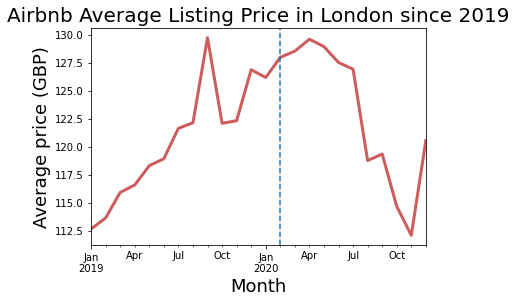

In [14]:
# plot average listing price
fig_covid_price = df_covid_combined.groupby('time')['price'].mean().plot(color = 'indianred',linewidth=3).get_figure()
plt.title('Airbnb Average Listing Price in London since 2019',fontsize = 20)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Average price (GBP)',fontsize = 18)
plt.axvline(x=pd.to_datetime('2020-02-12'), ymin=0, ymax=1,label='covid-19',linestyle = '--')

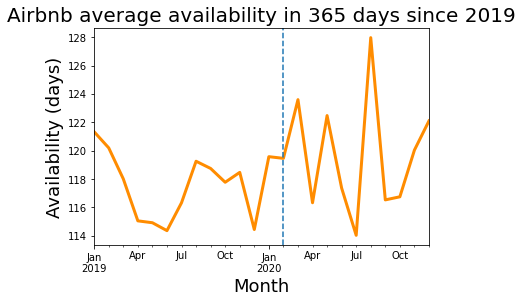

In [15]:
# plot average availability days
fig_covid_availability = df_covid_combined.groupby('time')['availability_365'].mean().plot(color = "darkorange",linewidth=3).get_figure()
plt.title('Airbnb average availability in 365 days since 2019',fontsize = 20)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Availability (days)',fontsize = 18)
plt.axvline(x=pd.to_datetime('2020-02-12'), ymin=0, ymax=1,label='covid-19',linestyle = '--')

# Executive Briefing

## 1 Introduction

In this report, Airbnb listings data was analysed in the past five years to gain some insights mainly from the following three aspects

- Policies and regulations regarding running Airbnb in London. We try to understand if government regulations have a big impact on the Airbnb business that we can find from the data provided on the website.

- Historical trend and future perspectives. We investigated the listing data in the past six years. We choose the most import factors that reflect the market activities, supply and demand.
   
- The impact of Covid-19. We process monthly data in the past two years, from Jan 2019 to the end of 2020 to investigate the trend in more details. From the same aspects in the previous part, we can see the Covid-19 impact in prominent in both supply and demand side.

## 2 Existing Policies 

The official policies of Airbnb hosting in the UK are claimed below:

_"If you host a property in England, Scotland, or Wales that’s available to let for 140 days or more per year, the government deems it a self-catering property that’s subject to business rates."_ [1]
    
As mentioned in reference [2], we have the following policies for running Airbnb in London.

- The 90-day rule in London - In 2017 a short-term rental regulation was introduced in London which applies to entire home listings on Airbnb. The London-specific measure is designed to promote responsible home sharing, to limit the number of nights each year hosts and landlords can rent out their property.
   
- Holiday let accommodation - If the property is exempt from the 90-day rule, then it may be classed as a self-catering property or holiday let accommodation. This means that if we have guests for more than 140 nights a year, we may be liable to pay business rates.
   
- Contracts and leases - In addition to local and national laws, the host may need to comply with building lease, contract or regulations too.

When it comes to covid-19, in July 2020, the previous Lockdown Regulations (SI 350) was replaced with the new regulations[3] which allowed business activities partly.

## 3 Data Source

- The data set is from inside Airbnb website, _"an independent, non-commercial set of tools and data"_[4], which are based on publicly available data from Airbnb.

- The data are available back to 2015 but not all monthly data are available. Under this circumstance, we sample a subset of data for our analysis.

## 4 Historical Trend on Listing Data

### 4.1 Number of listings since 2015

- The total number of listings went up from 20k in 2015 to 90k by 2020, which represent an annualized growth of around 35%.

- The fast growth of the number of listings suggests a fast growth of Airbnb's fundamentals since 2015.

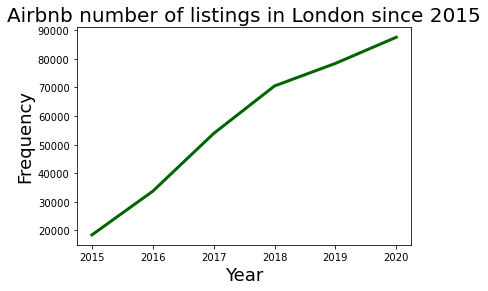

In [23]:
fig_precovid_listings

### 4.2 Average listing price since 2015

- The initial dip of the price might due to the increase of the supply while the demand did not go up fast enough accordingly.

- From 2016 the price is going up from 95 to more than 125, which is around 7% increase each year, this reflects the strongly increasing demand.

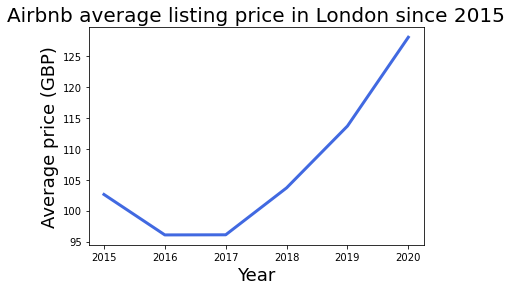

In [17]:
fig_precovid_price

### 4.3 Average listings annual availability since 2015

- The average annual availability counted in days is going down from more than 240 to 120 in 2018.

- After 2018 the available days became stable above 120, which is a reflection that people usually make Airbnb appointment several months ahead.

- The downtrend is a reflection of the strong demand of the markets, and since 2018, the supply and demand are getting into an equilibrium.

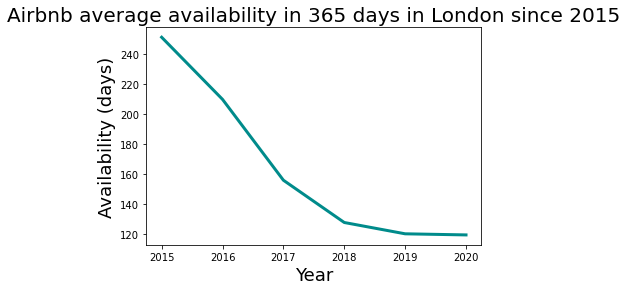

In [18]:
fig_precovid_availability

## 5 The impact of Covid-19

### 5.1 Number of listings since 2019

According to reference[5], the ninth case of coronavirus was found in the UK, which may mark that covid-19 outbreak started from 12 February 2020 (as shown in the figure below).

- The monthly number of listings data peaked in March 2020 when the government ordered national wide lockdown regulations [6]. 
   
- The number of listings went down quickly from 8,8000 to 7,4000 until late July when the lockdown was relaxing. 

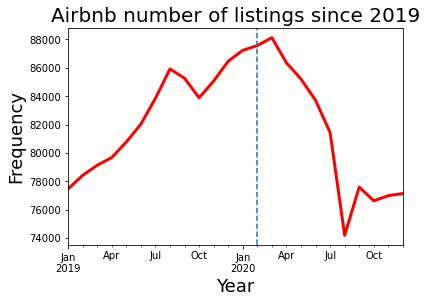

In [19]:
fig_covid_listings

### 5.2 Average listing price since 2019

- The average listing price peaked at April, which is a reflection of the decreasing of the demand which is at a faster rate than the decrease of the supply.

- Price rebound from October which is a reflection of the rebound of the demand.

- It shows that the price change is lagged one to two months than the supply change.

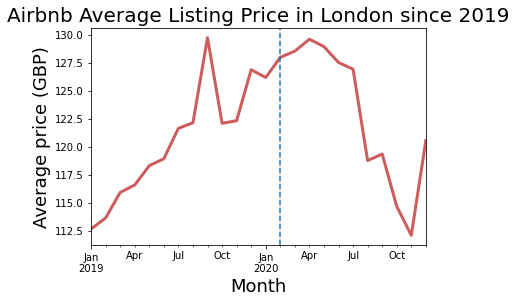

In [20]:
fig_covid_price

### 5.3 Average listings availability since 2019

- The availability data is volatile but in the range of 120 over 2020.

-  The level of available data suggest that both supply and demand decreased simultaneously, and the price adjustment contributed as well.

- The market is shrunk but remain robust in terms of the operation suggested by the availability date.

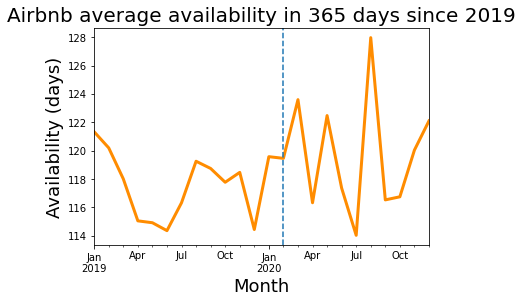

In [21]:
fig_covid_availability

## Summary

- The Airbnb business is growing very fast in the past five years and the momentum should remain in the future after Covid recovery.
   
- The regulations introduced in 2017 does not affect the Airbnb business from the data above and we assume there is not a strong reason to change the regulations.
   
- The Covid caused national lockdown did affect the Airbnb business a lot, which caused both decreases in demand and supply. But as long as the lockdown is released, the demand and supply will recover quickly.
   
- Overall, we see Airbnb is a strong and robust business and worth long term investments.

### References
   
- [1]Responsible hosting in the United Kingdom. (2021). Retrieved 10 January 2021, from https://www.airbnb.co.uk/help/article/1379/responsible-hosting-in-the-united-kingdom#taxes    

- [2]Important Airbnb regulations and laws you should know about in London - Hostmaker Blog. (2018). Retrieved 10 January 2021, from https://hostmaker.com/blog/important-airbnb-regulations-country-laws-know-london/

- [3]The Health Protection (Coronavirus, Restrictions) (No. 2) (England) Regulations 2020. (2021). Retrieved 10 January 2021, from https://www.legislation.gov.uk/uksi/2020/684/contents/made/data.htm

- [4]Get the Data. (2021). Retrieved 10 January 2021, from http://insideairbnb.com/about.html

- [5]BBC News Services. (2020). Coronavirus: Ninth case found in UK. Retrieved from https://www.bbc.com/news/uk-51481469

- [6]The Health Protection (Coronavirus, Restrictions) (England) Regulations 2020. (2021). Retrieved 13 January 2021, from https://www.legislation.gov.uk/uksi/2020/350/regulation/6/2020-03-26